# Image Augmentation Functions

## Library Imports

In [13]:
from PIL import ImageGrab
import numpy as np
import cv2
import matplotlib.pyplot as plt

% matplotlib inline

## Functions

In [59]:
def resize_img(orig_img, new_dim):
    '''
    DESCRIPTION:
        - resizes the original image.
    INPUT: 
        - orig_img is a numpy array (use cv2.imread() to transform img into numpy array).
        - new_dim is the base number of pixels for the new image.
    OUTPUT:
        - resized is a numpy array of the resized image.
    '''
    r = float(new_dim) / orig_img.shape[1]
    dim = (new_dim, int(orig_img.shape[0] * r))
    resized = cv2.resize(orig_img, dim, interpolation=cv2.INTER_AREA)
    
    plt.imshow(resized)
    plt.xticks([])
    plt.yticks([])
    
    return resized

In [60]:
def rotate_img(orig_img, deg_rot, scale):
    '''
    DESCRIPTION:
        - rotates the original image.
    INPUT: 
        - orig_img is a numpy array (use cv2.imread() to transform img into numpy array).
        - scale (btwn 0 and 1) zooms in on the image. scale (> 1) zooms out on the image. 
        - scale can be used to crop the image based only on the center.
    OUTPUT:
        - rotated_img is a numpy array of the rotated image.
    '''
    (height, width) = orig_img.shape[:2]
    center = (width/2, height/2)
    matrix = cv2.getRotationMatrix2D(center,
                                     angle=deg_rot,
                                     scale=scale)
    rotated_img = cv2.warpAffine(orig_img,
                                 matrix,
                                 (width, height))
    plt.imshow(rotated_img)
    plt.xticks([])
    plt.yticks([])
    
    return rotated_img

In [81]:
def crop_img(orig_img, h1, h2, w1, w2):
    '''
    DESCRIPTION:
        - crops the original image.
    INPUT: 
        - orig_img is a numpy array (use cv2.imread() to transform img into numpy array).
        - h1 and h2 defines height
        - w1 and w2 defines the width
    OUTPUT:
        - cropped_img is a numpy array of the cropped image.
    '''
    cropped_img = orig_img[h1:h2, w1:w2]
    
    plt.imshow(cropped_img)
    plt.xticks([])
    plt.yticks([])
    return cropped_img

### Read in the image

In [29]:
t1 = cv2.imread('data/test_1.jpg')
print(t1.shape)

(1110, 1200, 3)


### Show the original image

([], <a list of 0 Text yticklabel objects>)

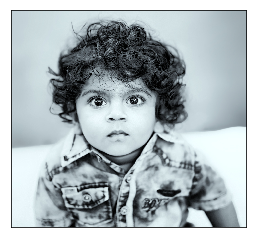

In [28]:
plt.imshow(t1)
plt.xticks([])
plt.yticks([])

### 1. Reshape the image

#### Define the ratio

In [34]:
# Around 1/10th of original pixel density
ratio = 100.0 / t1.shape[1]
dim = (100, int(t1.shape[0] * ratio))
resized = cv2.resize(t1, dim, interpolation=cv2.INTER_AREA)

#### Show the resized image

([], <a list of 0 Text yticklabel objects>)

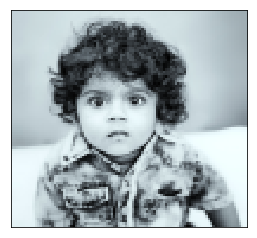

In [35]:
plt.imshow(resized)
plt.xticks([])
plt.yticks([])

#### Create a function for resizing images

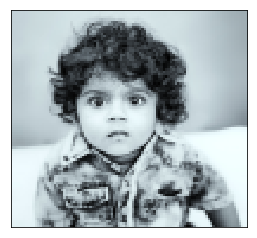

In [40]:
t = resize_img(t1, 100)

### 2. Rotate the image

#### Define the center of image

In [42]:
(h, w) = t1.shape[:2]
center = (w/2, h/2)

#### Define the rotation

In [54]:
m = cv2.getRotationMatrix2D(center, angle=45, scale=1)
rotated = cv2.warpAffine(t1, m, (w, h))

#### Show the rotated image

([], <a list of 0 Text yticklabel objects>)

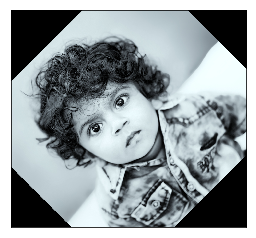

In [55]:
plt.imshow(rotated)
plt.xticks([])
plt.yticks([])

#### Create function to rotate image

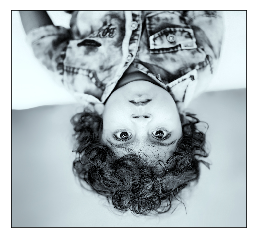

In [57]:
r_img = rotate_img(t1, deg_rot=180, scale=1)

### 3. Crop the image

#### Define the dimensions of the crop

In [77]:
h1, h2 = 400, 500
w1, w2 = 600, 700

crop = t1[h1:h2, w1:w2]

#### Show the cropped image

([], <a list of 0 Text yticklabel objects>)

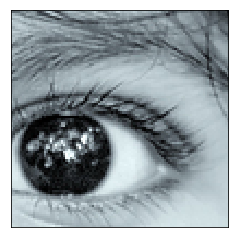

In [78]:
plt.imshow(crop)
plt.xticks([])
plt.yticks([])

#### Create a function for cropping images

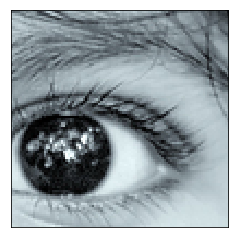

In [80]:
c_img = crop_img(t1, h1, h2, w1, w2)

## Test ImageGrab

([], <a list of 0 Text yticklabel objects>)

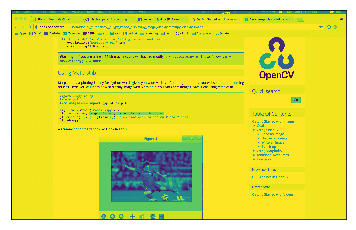

In [22]:
t2 = ImageGrab.grab(bbox=None) #bbox specifies specific region (bbox= x,y,width,height *starts top-left)
t2_np = np.array(t2) #this is the array obtained from conversion
t2_frame = cv2.cvtColor(t2_np, cv2.COLOR_BGR2GRAY)
plt.imshow(t2_frame)
plt.xticks([])
plt.yticks([])